Introdução à Ciência de Dados - Pós Graduação Cin UFPE em Ciência de Dados

*Sobre o trabalho:*
A base de dados utilizada neste trabalho foi disponibilizada pelo **Instituto Nacional de Pesquisas Espaciais (INPE)**, com cobertura temporal de 2000 a 2019.

O Inpe é uma unidade de pesquisa integrante do Ministério da Ciência e Tecnologia e Inovação (MCTI) que tem como missão produzir ciência e tecnologia nas áreas espacial e do ambiente terrestre. O Instituto é responsável pela condução do programa de monitoramento ambiental da Amazônia, que produz dados sistemáticos sobre o desmatamento na região. Esses dados estão dentre as principais fontes de informação para a tomada de decisão no que se refere às políticas de combate ao desmatamento na Amazônia. Sua divulgação à sociedade teve reconhecida importância na redução do desmatamento ocorrida após 2001 no Brasil. Fonte: http://www.fundoamazonia.gov.br/

Neste trabalho, os dados são do projeto Desmatamento PRODES/INPE, que realiza o monitoramento por satélites do desmatamento por corte raso na Amazônia Legal e produz, desde 1988, as taxas anuais de desmatamento na região, que são usadas pelo governo brasileiro para o estabelecimento de políticas públicas. 

As estimativas do PRODES tem demonstrado ser de grande importância para ações e planejamento de políticas públicas da Amazônia. Resultados recentes, a partir de análises realizadas com especialistas independentes, indicam nível de precisão próximo a 95%.


URL do dataSet: https://basedosdados.org/dataset/br-inpe-prodes?bdm_table=desmatamento_municipio


Grupo: Manuela Diniz Cavalcanti, Fabio Rodrigo Cavalcanti da Silva, Thaina Mariah Ramos Cordeiro, Krsna Murari de Albuquerque Rodrigues e Maria Paula Souza de Azevedo.

### **1 - Importação das bibliotecas Python:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **2 - Abertura do banco de dados do IBGE (desmatamento_municipio.csv)**

In [ ]:
#A base de dados foi hospedada no Github, para facilitar o trabalho colaborativo.
df = pd.read_csv('https://raw.githubusercontent.com/manueladinizc/DatasetAnalysis/main/desmatamento_municipio.csv')  
df.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nuvem,nao_observado,nao_floresta,hidrografia
0,2000,1100015,7137,1761.1,NaN,3639.6,0.0,6.1,1708.0,22.2
1,2001,1100015,7137,1834.2,73.1,3566.5,0.0,6.1,1708.0,22.2
2,2002,1100015,7137,1948.9,114.7,3451.8,0.0,6.1,1708.0,22.2
3,2003,1100015,7137,2014.9,66.0,3385.8,0.0,6.1,1708.0,22.2
4,2004,1100015,7137,2092.0,77.1,3308.7,0.0,6.1,1708.0,22.2


### **3 - Apresentação das dimensões do banco de dados original (linhas x colunas) e dos títulos das colunas:**

In [ ]:
df.shape

(15960, 10)

In [ ]:
df.columns

Index(['ano', 'id_municipio', 'area', 'desmatado', 'incremento', 'floresta',
       'nuvem', 'nao_observado', 'nao_floresta', 'hidrografia'],
      dtype='object')

### **4 - Retirada das colunas que não serão utilizadas ('hidrografia' e 'nuvem'):**

In [ ]:
df = df.drop(['hidrografia', 'nuvem'], axis = 1)
df.shape


(15960, 8)

In [ ]:
df.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nao_observado,nao_floresta
0,2000,1100015,7137,1761.1,NaN,3639.6,6.1,1708.0
1,2001,1100015,7137,1834.2,73.1,3566.5,6.1,1708.0
2,2002,1100015,7137,1948.9,114.7,3451.8,6.1,1708.0
3,2003,1100015,7137,2014.9,66.0,3385.8,6.1,1708.0
4,2004,1100015,7137,2092.0,77.1,3308.7,6.1,1708.0


### **5 - Resumo da Base de Dados:**

In [ ]:
df.info() #Fornece um resumo do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15960 entries, 0 to 15959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            15960 non-null  int64  
 1   id_municipio   15960 non-null  int64  
 2   area           15960 non-null  int64  
 3   desmatado      15960 non-null  float64
 4   incremento     15200 non-null  float64
 5   floresta       15960 non-null  float64
 6   nao_observado  15960 non-null  float64
 7   nao_floresta   15960 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 997.6 KB


### **6 - Remoção das linhas duplicadas (não houve linhas duplicadas no banco de dados):**

In [ ]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True) 
df.shape


(15960, 8)

### **7 - Análise dos valores de cada coluna:**

In [ ]:
print('Coluna Ano: ', df['ano'].unique()) 
print('Coluna desmatado: ', df['desmatado'].unique()) 
print('Coluna incremento: ', df['incremento'].unique()) 
print('Coluna floresta: ', df['floresta'].unique()) 
print('nao_observado: ', df['nao_observado'].unique()) 
# O valor nan(not a number) aparece na coluna 'incremento' quando o ano é 2000, devido a ser esse o primeiro ano de medição, ou seja, ainda não houve um incremento.


Coluna Ano:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
Coluna desmatado:  [1761.1 1834.2 1948.9 ... 2393.4 2428.2 2491.2]
Coluna incremento:  [  nan  73.1 114.7 ... 116.3 137.2 150.1]
Coluna floresta:  [3639.6 3566.5 3451.8 ... 2829.2 2789.2 2766.2]
nao_observado:  [  6.1   6.4   9.4 ... 601.9 606.9  20. ]


### **8 - Substituindo valores NaN da coluna incremento por 0.0**

In [ ]:
df = df.fillna(0)
print('Coluna incremento: ', df['incremento'].unique()) 
df.head()

Coluna incremento:  [  0.   73.1 114.7 ... 116.3 137.2 150.1]


,ano,id_municipio,area,desmatado,incremento,floresta,nao_observado,nao_floresta
0,2000,1100015,7137,1761.1,0.0,3639.6,6.1,1708.0
1,2001,1100015,7137,1834.2,73.1,3566.5,6.1,1708.0
2,2002,1100015,7137,1948.9,114.7,3451.8,6.1,1708.0
3,2003,1100015,7137,2014.9,66.0,3385.8,6.1,1708.0
4,2004,1100015,7137,2092.0,77.1,3308.7,6.1,1708.0


### **9 - Agrupando dados do desmatamento por município:**

Ao agrupar por município foi observado que existiam 760 instâncias na base de dados. Assim, decidiu-se que era mais adequado agrupar por estado.

In [ ]:
desmatamentoPorMunicipio = df.groupby(df.id_municipio)
desmatamentoPorMunicipio[['area', 'desmatado', 'incremento','floresta', 'nao_observado', 'nao_floresta']].sum().round()

,area,desmatado,incremento,floresta,nao_observado,nao_floresta
id_municipio,,,,,,
1100015,149877,45959.0,625.0,67254.0,102.0,35868.0
1100023,94101,65508.0,662.0,26698.0,0.0,1882.0
1100031,27762,20167.0,153.0,7202.0,11.0,237.0
1100049,80241,51795.0,223.0,27739.0,0.0,550.0
1100056,58905,16620.0,89.0,16153.0,0.0,26132.0
...,...,...,...,...,...,...
5108600,156303,91186.0,1625.0,60818.0,36.0,3923.0
5108808,22827,19270.0,90.0,3541.0,0.0,0.0
5108857,40782,19658.0,226.0,9009.0,3.0,11840.0


### **10 - Criando uma coluna para os estados e transformando os códigos de 07 dígitos dos municípios em estados da federação.**


A Tabela de Códigos de Municípios do IBGE apresenta a lista dos municípios brasileiros associados a um código composto de 7 dígitos, sendo os dois primeiros referentes ao código da Unidade da Federação.

Fonte: https://www.ibge.gov.br/explica/codigos-dos-municipios.php



In [ ]:
df = df.assign(estado = df.id_municipio.astype('string')) 
df.estado = df.id_municipio.astype('string').str[0:2]
df.loc[df.estado == '11', 'estado'] = 'Rondônia'
df.loc[df.estado == '12', 'estado'] = 'Acre'
df.loc[df.estado == '13', 'estado'] = 'Amazonas'
df.loc[df.estado == '14', 'estado'] = 'Roraima'
df.loc[df.estado == '15', 'estado'] = 'Pará'
df.loc[df.estado == '16', 'estado'] = 'Amapá'
df.loc[df.estado == '17', 'estado'] = 'Tocantins'
df.loc[df.estado == '21', 'estado'] = 'Maranhão'
df.loc[df.estado == '51', 'estado'] = 'Mato Grosso'
df.head()

,ano,id_municipio,area,desmatado,incremento,floresta,nao_observado,nao_floresta,estado
0,2000,1100015,7137,1761.1,0.0,3639.6,6.1,1708.0,Rondônia
1,2001,1100015,7137,1834.2,73.1,3566.5,6.1,1708.0,Rondônia
2,2002,1100015,7137,1948.9,114.7,3451.8,6.1,1708.0,Rondônia
3,2003,1100015,7137,2014.9,66.0,3385.8,6.1,1708.0,Rondônia
4,2004,1100015,7137,2092.0,77.1,3308.7,6.1,1708.0,Rondônia


### **11 - Agrupamento por Estado da federação:**

In [ ]:
dfEstado = df.groupby(df.estado)
df2 = dfEstado[['area', 'desmatado', 'incremento','floresta', 'nao_observado']].sum().round()
df2

,area,desmatado,incremento,floresta,nao_observado
estado,,,,,
Acre,3588564,432240.0,9294.0,3065427.0,8174.0
Amapá,3001278,57021.0,1482.0,1723014.0,55507.0
Amazonas,33382881,722238.0,17808.0,28478097.0,18900.0
Maranhão,5557146,2126509.0,36348.0,773628.0,330304.0
Mato Grosso,19000674,4185996.0,70741.0,6755165.0,92329.0
Pará,26242524,5031058.0,104912.0,17204962.0,131651.0
Rondônia,5047854,1756514.0,32177.0,2723439.0,3314.0
Roraima,4750536,192404.0,5860.0,2627328.0,14436.0
Tocantins,5857551,631726.0,1961.0,208306.0,946870.0


### **12 - Agrupamento por estado no início de 2020**

In [ ]:
df2020 = df.loc[df['ano'] == 2020]
dfEstado2020 = df2020.groupby(df.estado)
df3 = dfEstado2020[['area', 'desmatado', 'incremento','floresta']].sum().round()
df3.to_csv('estado2020.csv')
df3 = pd.read_csv('estado2020.csv')
df3

,estado,area,desmatado,incremento,floresta
0,Acre,170884,24690.0,656.0,145361.0
1,Amapá,142918,3123.0,10.0,86716.0
2,Amazonas,1589661,43369.0,1474.0,1418725.0
3,Maranhão,264626,106829.0,319.0,39537.0
4,Mato Grosso,904794,220569.0,1827.0,302253.0
5,Pará,1249644,276487.0,4625.0,837451.0
6,Rondônia,240374,96093.0,1326.0,117831.0
7,Roraima,226216,11636.0,325.0,139290.0
8,Tocantins,278931,30689.0,25.0,9996.0


### **13 - Agrupamento por estado no início de 2020, adiconando as áreas urbanas ['nao_floresta']**

In [ ]:
df2020 = df.loc[df['ano'] == 2020]
dfEstado2020 = df2020.groupby(df.estado)
df4 = dfEstado2020[['area', 'desmatado', 'incremento','floresta','nao_floresta']].sum().round()
df4.to_csv('estado2020.csv')
df4 = pd.read_csv('estado2020.csv')
df4

,estado,area,desmatado,incremento,floresta,nao_floresta
0,Acre,170884,24690.0,656.0,145361.0,74.0
1,Amapá,142918,3123.0,10.0,86716.0,25612.0
2,Amazonas,1589661,43369.0,1474.0,1418725.0,48868.0
3,Maranhão,264626,106829.0,319.0,39537.0,112917.0
4,Mato Grosso,904794,220569.0,1827.0,302253.0,377537.0
5,Pará,1249644,276487.0,4625.0,837451.0,73469.0
6,Rondônia,240374,96093.0,1326.0,117831.0,24632.0
7,Roraima,226216,11636.0,325.0,139290.0,61222.0
8,Tocantins,278931,30689.0,25.0,9996.0,236726.0


### **14 - Agrupamento por ano**

In [ ]:
dfAno = df.groupby(df.ano)
dfAno[['desmatado']].sum()

,desmatado
ano,
2000,532920.5
2001,587431.6
2002,613144.6
2003,643523.7
2004,670690.2
2005,694580.0
2006,705478.5
2007,716979.2
2008,730279.9


# **15 - Visualizar dados**

---



# **15.1) Apresentação de estatísticas, gráficos e figuras relativas aos dados**

**1) Qual o incremento de área queimada por ano?**

Observa-se, pelo gráfico 1, que após alcançar um nível acima de 50000 km², o desmatamento caiu rapidamente até meados de 2009 e só voltou a aumentar a partir de 2016, ainda que de forma mais lenta.

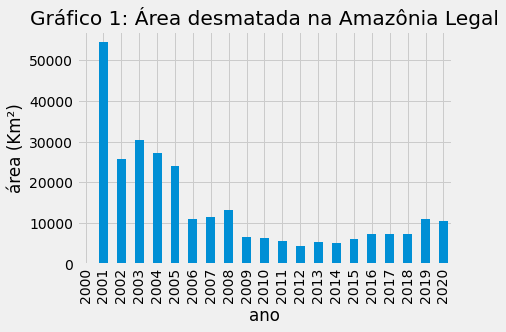

In [ ]:
plt.style.use('fivethirtyeight')  
grafico1 = df.groupby(['ano'])['incremento'].sum()
grafico1.plot(kind='bar').set_xlabel('Ano')
grafico1.plot(kind='bar').set_ylabel('área (Km²)')
grafico1.plot(kind='bar').set_title('Gráfico 1: Área desmatada na Amazônia Legal')
plt.show()

 **2) Qual o estado o teve maior área desmatada no período analisado?**

De acordo com o gráfico 2, os estados que mais contribuíram com o desmatamento foram o Pará - acima de 100.000 km² - e o Mato Grosso - com aproximadamente 60.000 km².

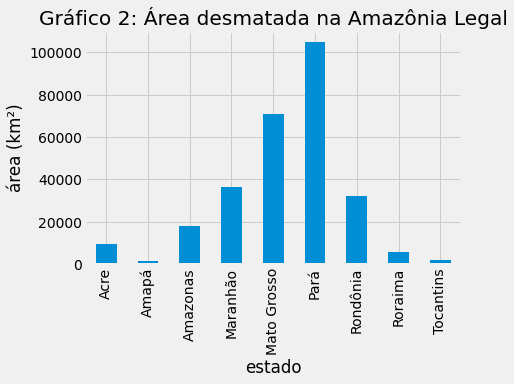

In [ ]:
grafico2 = df.groupby(['estado'])['incremento'].sum()
grafico2.plot(kind='bar').set_xlabel('Estado da federação')
grafico2.plot(kind='bar').set_ylabel('área (km²)')
grafico2.plot(kind='bar').set_title('Gráfico 2: Área desmatada na Amazônia Legal')
plt.show()

# **15.2) Geração de conhecimento**

**1) Qual o estado com o maior percentual de desmatamento?**

De acordo com o gráfico 3, dois estados se destacam quanto ao percentual de desmatamento em relação a suas áreas: o Maranhão, com 40,37%, e o estado de Rondônia, com 39,98 % da área do estado.  


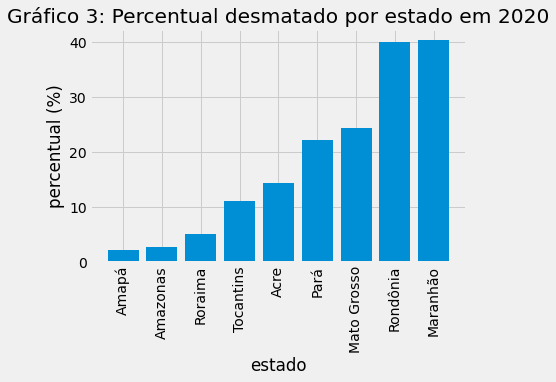

In [ ]:
#Na sessão 12 - Agrupamento por estado no ano de 2020, onde foi criada o data frame df3 para gráfico abaixo:

df3['%desmatado'] = ((df3['desmatado']/df3['area'])*100)
df3_sorted = df3.sort_values('%desmatado')
graf3 = plt.bar('estado', '%desmatado', data = df3_sorted) 
plt.xticks(rotation=90)
plt.title('Gráfico 3: Percentual desmatado por estado em 2020')
plt.ylabel('percentual (%)')
plt.xlabel('estado')
plt.show()

**2) Qual a área de floresta dos estados da amazônia legal?**

O Gráfico 4 mostra que, no início de 2020, o Amazonas e o Acre ainda possuíam mais de 80% das suas respectivas áreas sendo de floresta amazônica. Atribuiu-se esse alto percentual ao fato de que os maiores focos de desmatamento estão nas bordas da floresta e esses estados estão situados mais ao centro da floresta. 

Por outro lado, Tocantis, Maranhão e Matogo Grosso são os estados que menos possuem área de floresta no início de 2020, dentre os estados que estão no polígono da Amazônia Legal. Observe-se, porém, que os três estão localizados na borda do bioma Amazônia e, por isso, já possuíam um menor percentual de área florestal, dividindo seus territórios com o bioma Cerrado. Some-se a isso o fato de que justamente a borda da Floesta Amazônica é a região que mais sofreu desmatamento. Restaram, portanto, como os estados que possuíam menor área de floresta em 2020.

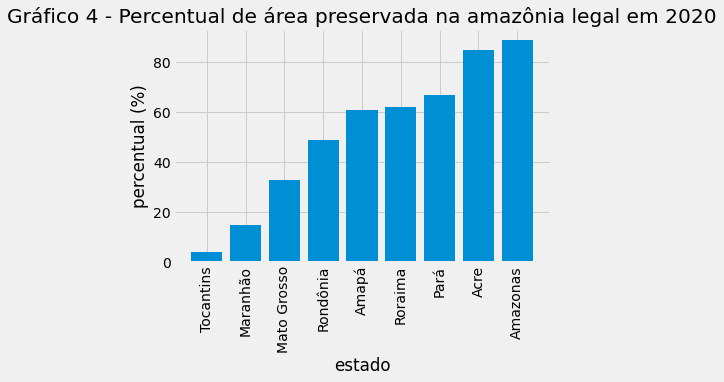

In [ ]:
df3['%floresta'] = ((df3['floresta']/df3['area'])*100).round()
df4_sorted = df3.sort_values('%floresta')
graf4 = plt.bar('estado', '%floresta', data = df4_sorted) 
plt.xticks(rotation=90)
plt.title('Gráfico 4 - Percentual de área preservada na amazônia legal em 2020')
plt.ylabel('percentual (%)')
plt.xlabel('estado')
plt.show()

**3) Qual a relação entre área urbana e desmatada de cada estado?**

De acordo com o gráfico 5, notou-se que área de desmatamento não tem relação direta com a área urbana, pois o Mato Grosso possui área desmatada bem menor que a urbana, diferente do Pará que possui a área desmatada bem maior que a área urbana.



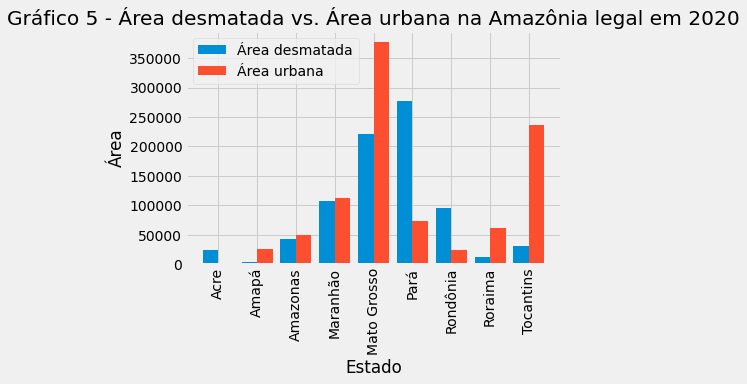

In [ ]:
X = df4['estado']
Ydesmatado = df4['desmatado']
Zurbano = df4['nao_floresta']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ydesmatado, 0.4, label = 'Área desmatada')
plt.bar(X_axis + 0.2, Zurbano, 0.4, label = 'Área urbana')
  
plt.xticks(X_axis, X)
plt.xlabel("Estado")
plt.ylabel("Área")
plt.xticks(rotation=90)
plt.title("Gráfico 5 - Área desmatada vs. Área urbana na Amazônia legal em 2020")
plt.legend()
plt.show()
